In [244]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import preprocessing as pre
warnings.filterwarnings('ignore')

In [214]:
d = pd.read_excel("Online Retail.xlsx",sheetname=0)

In [215]:
np.shape(d)

(541909, 8)

In [216]:
d.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [217]:
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [218]:
d.sort_values( by="InvoiceDate" ,inplace= True )

In [237]:
cleanedData = d[~(d.InvoiceNo.str.match('(C.*)').str.len() > 0)]
lostRevenue = d[(d.InvoiceNo.str.match('(C.*)').str.len() > 0)]

In [238]:
print(np.shape(cleanedData) , np.shape(lostRevenue))

(532621, 8) (9288, 8)


In [239]:

print("Data shape ",np.shape(cleanedData))
print("Orignal Custormers :", len(cleanedData.CustomerID.unique()))
print("Unique Saled Products : ", len(cleanedData.StockCode.unique()))
print("Sales Country : ", len(cleanedData.Country.unique()))

Data shape  (532621, 8)
Orignal Custormers : 4340
Unique Saled Products :  4059
Sales Country :  38


In [246]:
cleanedData , lostRevenue = pre.feature_transactional_Price (cleanedData , lostRevenue)

cleanedData['Month'] = cleanedData.InvoiceDate.dt.month
cleanedData['WeekDay']=cleanedData.InvoiceDate.dt.weekday
lostRevenue['Month'] = lostRevenue.InvoiceDate.dt.month
lostRevenue['WeekDay']=lostRevenue.InvoiceDate.dt.weekday


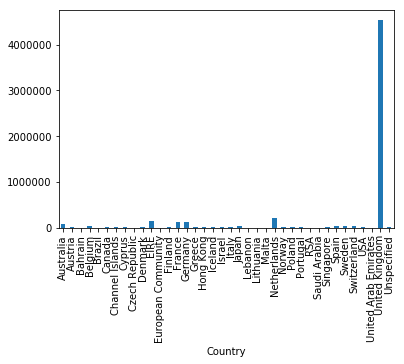

In [247]:
## checking the country with highest sales 
%matplotlib inline
cleanedData.groupby("Country").Quantity.sum().plot(kind="bar")

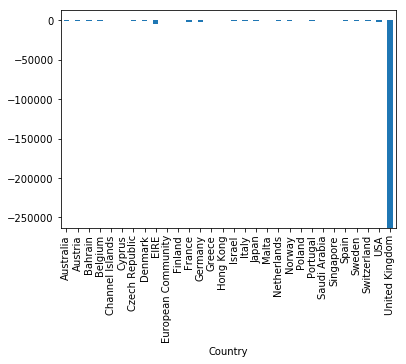

In [248]:
lostRevenue.groupby("Country").Quantity.sum().plot(kind='bar')


In [250]:

Maxproducts = pd.DataFrame(cleanedData.groupby(["StockCode","Country", 'Quantity' ,"UnitPrice","TransactionalPrice"]).count().reset_index()).iloc[:,0:4|5]
Maxproducts = pd.DataFrame(Maxproducts.groupby(["Country","StockCode","UnitPrice"])["Quantity"].sum()).reset_index()
Maxproducts = Maxproducts.loc[Maxproducts.groupby("Country")["Quantity"].idxmax()].reset_index(drop=True)
Maxproducts.sort_values("Quantity", ascending=False).reset_index(drop=True)

,Country,StockCode,UnitPrice,Quantity
0,United Kingdom,23843,2.08,80995
1,Japan,23084,1.79,3408
2,Netherlands,23084,2.08,3361
3,France,23084,1.79,1776
4,Australia,22492,0.55,1728
5,EIRE,17084R,0.16,1440
6,Sweden,23310,0.42,900
7,Spain,84997C,3.75,648
8,Germany,15036,0.65,600
9,Canada,37370,1.06,504


## Now seeing what are the most canceled products 

In [251]:


lostproducts = pd.DataFrame(lostRevenue.groupby(["StockCode","Country", 'Quantity' ,"UnitPrice","TransactionalPrice"]).count().reset_index()).iloc[:,0:4|5]

lostproducts = pd.DataFrame(lostproducts.groupby(["Country","StockCode","UnitPrice"])["Quantity"].sum()).reset_index()
lostproducts = lostproducts.loc[lostproducts.groupby("Country")["Quantity"].idxmin()].reset_index(drop=True)
lostproducts.sort_values("Quantity").reset_index(drop = True)

,Country,StockCode,UnitPrice,Quantity
0,United Kingdom,23843,2.08,-80995
1,Japan,22328,2.55,-624
2,Netherlands,M,0.22,-480
3,Spain,72802C,1.25,-288
4,Germany,84598,0.21,-288
5,EIRE,22950,1.25,-288
6,France,22959,0.42,-250
7,Sweden,85232B,4.95,-240
8,Switzerland,84012,0.85,-120
9,Australia,22738,1.45,-120


# Top ten customers 

In [252]:
((cleanedData.groupby(["CustomerID","Country"])["TransactionalPrice"].sum()).sort_values( ascending=False)).head(10)

CustomerID  Country       
14646.0     Netherlands       280206.02
18102.0     United Kingdom    259657.30
17450.0     United Kingdom    194550.79
16446.0     United Kingdom    168472.50
14911.0     EIRE              143825.06
12415.0     Australia         124914.53
14156.0     EIRE              117379.63
17511.0     United Kingdom     91062.38
16029.0     United Kingdom     81024.84
12346.0     United Kingdom     77183.60
Name: TransactionalPrice, dtype: float64

In [253]:
((lostRevenue.groupby(["CustomerID","Country"])["TransactionalPrice"].sum()).sort_values( ascending=True)).head(10)

CustomerID  Country       
16446.0     United Kingdom   -168469.60
12346.0     United Kingdom    -77183.60
15098.0     United Kingdom    -39267.00
16029.0     United Kingdom    -30032.23
15749.0     United Kingdom    -22998.40
12744.0     Singapore         -12158.90
14911.0     EIRE              -11252.44
12931.0     United Kingdom     -8593.15
12536.0     France             -8495.01
14096.0     United Kingdom     -8043.88
Name: TransactionalPrice, dtype: float64

# Exploratory Sales

## Weekly Sales Display Graph 

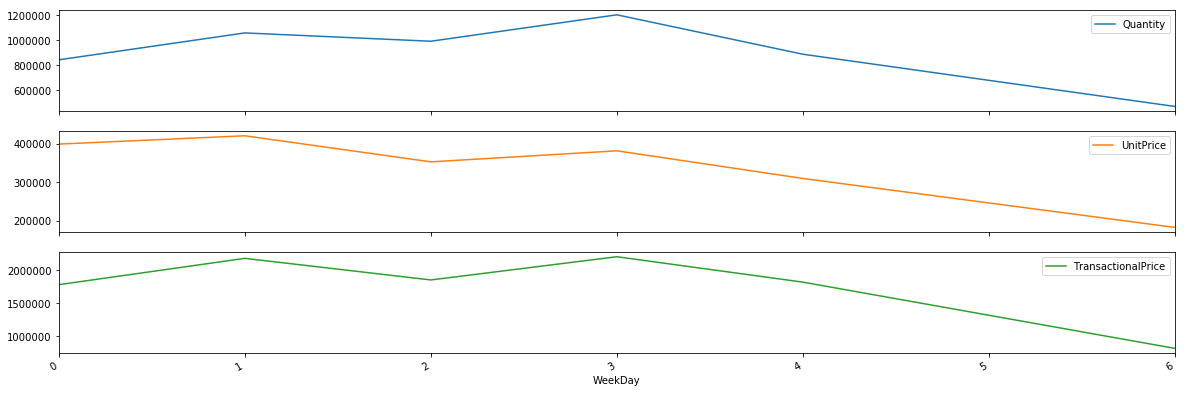

In [254]:

weekDaySales = cleanedData.groupby("WeekDay").sum()
weekDaySales.drop(["CustomerID","Month"] , axis=1 , inplace=True)
weekDaySales.columns

weekDaySales.plot(subplots=True , figsize=(20,7))
plt.show()

## Monthly Sales Display Graph

### Below Picture Also reflects that Quaterly Sales are high by the end of the year 

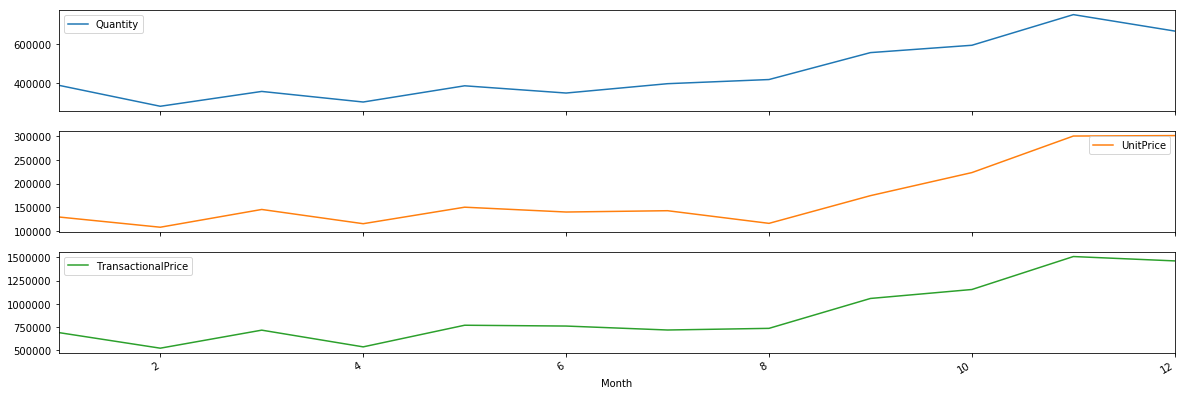

In [255]:
monthlySales = cleanedData.groupby('Month').sum()

monthlySales.drop(["CustomerID","WeekDay"], axis=1 , inplace=True)
monthlySales.plot(subplots=True , figsize=(20,7))
plt.show()




## Now we will move towards the a single customer direction , first droping the useless columns

Index(['Quantity', 'UnitPrice', 'CustomerID', 'TransactionalPrice'], dtype='object')


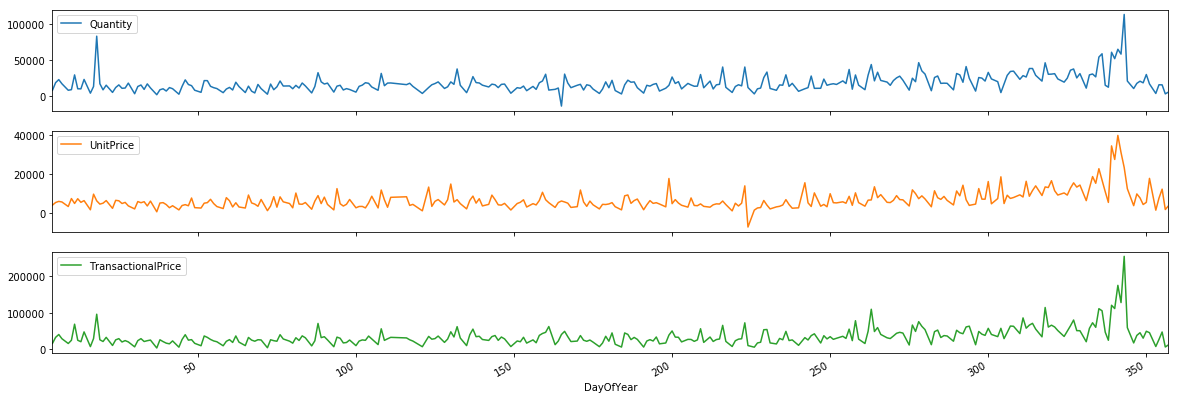

In [259]:
customerData = cleanedData.copy()
customerData.drop(["Month","WeekDay"] , axis=1 ,inplace=True)
customerData['DayOfYear'] = customerData.InvoiceDate.dt.dayofyear 
cusData = customerData.groupby(['DayOfYear']).sum()

### See the daily sales of all customers over all 365 days 

%matplotlib inline
print(cusData.columns)
cusData.drop( ['CustomerID'], axis = 1, inplace=True)
cusData.plot(subplots=True ,y=['Quantity','UnitPrice','TransactionalPrice'], figsize=(20,7))
plt.show()

## Now subsetting the data each unique No , along with the date and customer ,
### such that we would have combined purchase order under each user in their individual time

In [261]:
newArr = []
itm = cleanedData.groupby(["InvoiceNo" , "InvoiceDate","CustomerID"]).sum().reset_index()
print("Printing the Unique Customers ", len(itm.CustomerID.unique()))
print("Shape of combined dateset",itm.shape)

Printing the Unique Customers  4339
Shape of combined dateset (18566, 8)


### Lets do prediction from Here , just for testing from about data¶


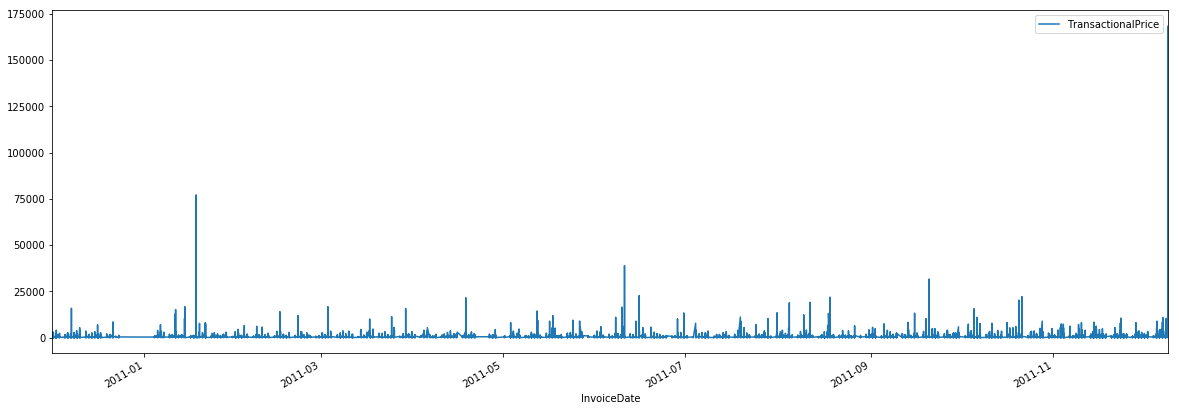

In [262]:
itm.plot(x="InvoiceDate",y="TransactionalPrice", figsize=(20,7))
plt.show()

### Filter Data of based on Single Customer ,
### Quaterly , Monthly and Weekly intensity of Each Customer ID

In [263]:
itm.drop(["Month","WeekDay"], axis = 1 , inplace = True)
itm["Month"] = itm.InvoiceDate.dt.month
itm["Week"]= itm.InvoiceDate.dt.week

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,TransactionalPrice,Month,Week
0,536365,2010-12-01 08:26:00,17850.0,40,27.37,139.12,12,48
1,536366,2010-12-01 08:28:00,17850.0,12,3.70,22.20,12,48
2,536367,2010-12-01 08:34:00,13047.0,83,58.24,278.73,12,48
3,536368,2010-12-01 08:34:00,13047.0,15,19.10,70.05,12,48
4,536369,2010-12-01 08:35:00,13047.0,3,5.95,17.85,12,48


### Single Customer purchase Timeline /// Filter
### Calcualting the index and number of purchase order of all customer

In [265]:
lenOfEachInvoices = []

for i in np.arange(0,itm.shape[0]):
    lenOfEachInvoices.append(len(itm[itm.CustomerID == itm["CustomerID"][i]]))
    #print(i , " ",len(itm[itm.CustomerID == itm["CustomerID"][i]]))

maxIndex = np.argmax(lenOfEachInvoices)
print("MaxIndex ",maxIndex)

MaxIndex  61


### Slection the customer with max purchase order 
### selecting the index number 61 , who has the most purchase history .... More data better for forcasting 

In [266]:
singleUser = itm[itm.CustomerID == itm["CustomerID"][maxIndex]]
singleUser["DayOfYear"] = singleUser.InvoiceDate.dt.dayofyear
singleUser.reset_index(inplace=True, drop=True)
saleIntensityWeek = singleUser.groupby("Week").size()
saleIntensityMonth = singleUser.groupby("Month").size()
print( "Weekly Intensity ", sum(saleIntensityWeek) / 7)
print( "Monthly Intensity ",sum(saleIntensityMonth) / 12)

Weekly Intensity  30.1428571429
Monthly Intensity  17.5833333333


## As this person has large number of purchase orders , So weekly analysis is better , remembering the weekly window size of 30 , which will prove better for forcasting 

### But first that user's purchase plot view 

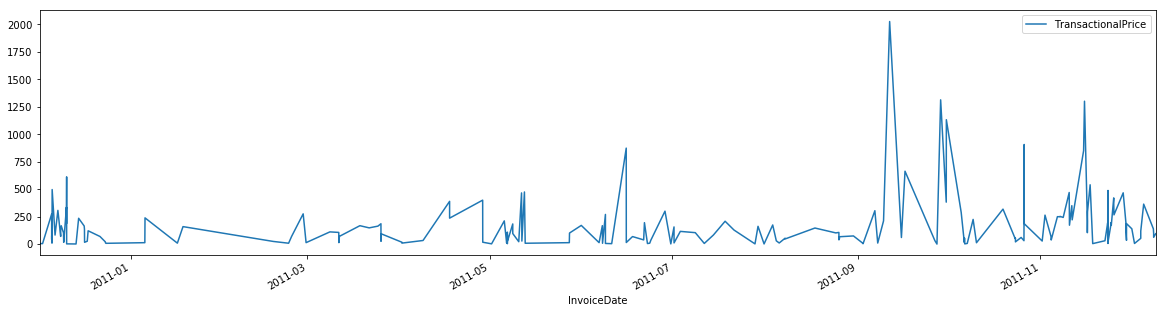

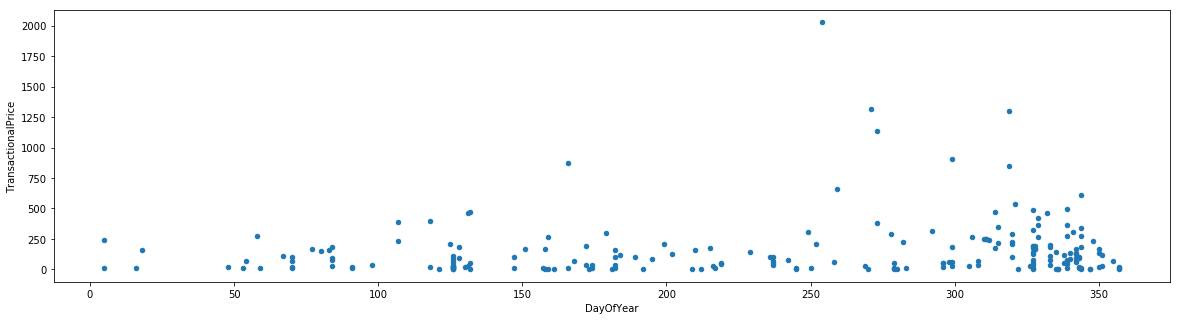

In [267]:
singleUser.plot(x="InvoiceDate",y="TransactionalPrice" ,   figsize=(20,5))
singleUser.plot(x="DayOfYear", y="TransactionalPrice", kind="scatter", figsize=(20,5))
plt.show()

### Now single case forcasting .... Proving that a 
###  How much revevnue can be expected from a customer based on his next or coming purchase ( n+1 )

In [268]:
## For calculating trend in the series 


def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen


## For evaluating trend in the series 

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

### evaluating the smotthing 

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [269]:
OneLess = singleUser.copy()
OneLess.drop(OneLess.tail(1).index,inplace = True)


## The parameter of 30 <- as for weekly intensive sales window 
## Rest is the already tuned optimal parameter for n+1 forcasting
## Last paramter is '1' forcasting n+1

x = list((triple_exponential_smoothing(list(OneLess.TransactionalPrice), 29, 0.716, 0.029, 0.993, 1)))

print("Forcasted Length ", len(x))
print("Predicted Value ",x[-1])
print("Expected Value ", list(singleUser.TransactionalPrice)[-1])



Forcasted Length  211
Predicted Value  113.884850986
Expected Value  94.11


#### Close with little gap , graph of results will make it even more appealing

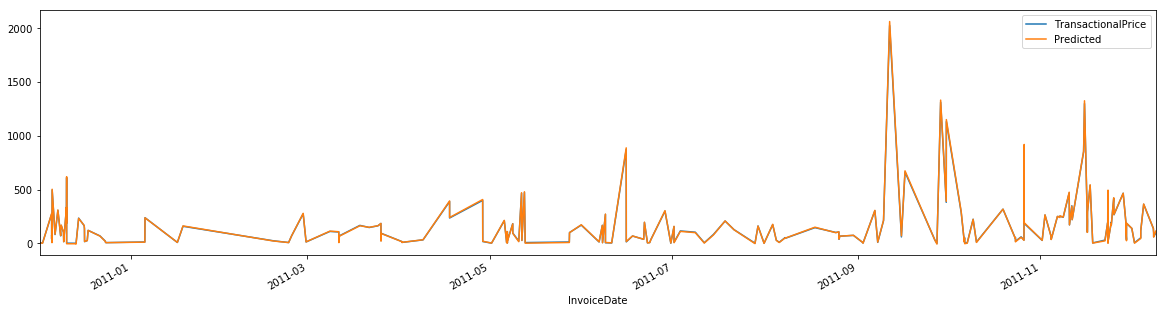

In [270]:
singleUser["Predicted"] = x

### Adding another variable , so graph now is against two paramters 

singleUser.plot(x="InvoiceDate",y=["TransactionalPrice","Predicted"] , figsize=(20,5))
plt.show()

### Very minor errors in some occuions 

## Now Most Purchase : Mark Down -> Recomended Items for each users , based on his location

### Preprocess for User items based on single demographics 
## Lets start with single country -> Grouping by customers 

In [272]:
uniqueItems = pd.unique(list(d.StockCode))
print("Unique Proucts ", len(uniqueItems))
uniqueItems = [str(i) for i in uniqueItems]

### 4070 unique Products 

Unique Proucts  4070


### Grouping , Country  and used Product Stock ID wise => and calculating the quantity 

In [273]:
demographicData = pd.DataFrame(cleanedData.groupby(["Country","CustomerID","StockCode"])["Quantity"].count()).reset_index()

### Lets start with the  small data of Netherlands country , as it is second best country of this retail store

In [276]:
_country = "Netherlands"

x = pd.DataFrame(demographicData.groupby("Country")['CustomerID'].unique()).reset_index()
x = x.ix[x.Country == _country,1]
uniqueCustomers = 0
for item in x:
    uniqueCustomers = list(item)
print("Unique customers in ",_country , " : ",len(uniqueCustomers))

Unique customers in  Netherlands  :  9


## User data identifies a big matrix , of total unique users that belong to the a country and against unique Items which are 4070 in this case 
### dataframe would be 9 x 4070

In [278]:
userData = pd.DataFrame(0,index=uniqueCustomers , columns=uniqueItems)

### Regional Count Data , on each country , then subsetting it one for Netherlands ( # At the moment # )

In [280]:
regionalCountData = pd.DataFrame(cleanedData.groupby(["Country","CustomerID","StockCode"])["Quantity"].sum()).reset_index()
activeData = regionalCountData.ix[ regionalCountData.Country == _country , : ]

### Getting in the list format , so it would be easy in populating the user big Matrix

In [281]:
temp = list(activeData.StockCode)
print(len(temp), type(temp))
temp = list([str(i) for i in temp])
print(type(temp) , len(temp))
activeData.StockCode = list(temp)
type(activeData.StockCode)

938 <class 'list'>
<class 'list'> 938


pandas.core.series.Series

## now population of Array 

In [282]:
for index,row in activeData.iterrows():
    #print(row['CustomerID'] , str(row['StockCode']), row['Quantity'])
    userData.loc[row['CustomerID'], str(row['StockCode'])] = row['Quantity']
    #print(userData.loc[row['CustomerID'], str(row['StockCode'])])
   


#### The matrix , dataframe is now populated but it is hightly sparse 
#### Next is the correlation among uesrs 

## Correlation matrix  using the given code

In [284]:
uniqueCustomersCorrelationMatrix =pd.DataFrame(0, index= uniqueCustomers, columns=uniqueCustomers)


(9, 9)

In [286]:
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [287]:
### taking tranpose of userData

uniqueCustomersCorrelationMatrix = userData.transpose()


### Calculating the correlation using the matrix 
### and then againist each users in the region by filtering correlation that is greater than 0.05
### Reason the data is too sparse , a small relation can leads to good recommendation 

In [291]:
corrmat = uniqueCustomersCorrelationMatrix.corr()
col_names = corrmat.columns.values

score = []
variable = []
for col, row in (corrmat.abs() > 0.05).iteritems():

    variable.append(col)
    score.append(col_names[row.values])
       
    #print(variable)
    #print(score)

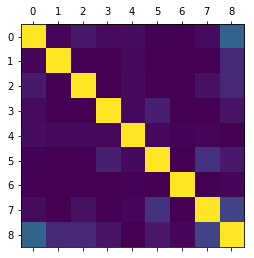

In [293]:
plt.matshow(corrmat)

### Converting StockCode to string , so it better in comparison 

In [290]:
temp = cleanedData.StockCode
temp = [str(i) for i in temp]
cleanedData.StockCode = temp

In [292]:
userID = []
RecomendedProducts = []

for j in range(0,len(score)):
    print("\n\n")
    all_prefference = pd.DataFrame()
    active_user = variable[j]
    active_score = score[j]
    print(active_score)
    userID.append(active_user)
    if (len(active_score) >= 2 ):
    
        for i in active_score:
            if i != active_user :
                print(i)
           
                ### Filtering the purchased products of other other users
                ### Of the same region 
                
                stock_count = activeData.ix[ regionalCountData.CustomerID == i, : ]
                sorted_count = stock_count.sort_values('Quantity' , ascending=False)
                selected_stockCode_count = sorted_count.iloc[0:10,2:]
                #print(type(selected_stockCode_count))
                all_prefference = all_prefference.append(selected_stockCode_count, ignore_index=True)
                
                ### saving it in all_prefference => Top products 
                

        ### Droping the duplicating products 

        all_prefference.drop_duplicates(subset='StockCode' , inplace=True)
         

        #print(all_prefference.shape)
        all_prefference.sort_values('Quantity' , ascending=False , inplace=True)
        top_twentyfive_stock_codes = all_prefference.iloc[0:25,0]


        uniqueStockCode_Descrption = cleanedData.drop_duplicates(subset='StockCode')
        uniqueStockCode_Descrption = uniqueStockCode_Descrption.reset_index(drop= True)
        
        new = cleanedData.loc[cleanedData["StockCode"].isin(top_twentyfive_stock_codes)]
        
        new = new.loc[new["Country"] == _country ]
        
        new = new.drop_duplicates("StockCode").reset_index(drop=True)
        
        localItems = []
        #print(new.shape)
        #print(new.head())
        #print("Recomedation for user ID " , active_user)
        
        ### Print the products 
        
        try :
            for i in range(0,10):
                localItems.append(new.Description[i])
                print(new.Description[i])
        except Exception:
            pass
        RecomendedProducts.append(localItems)
        
    
    else :
        
        
        ### Else is for the those users who have vanilla problem , who have no correlation 
        ### So here only top regional projects , that have high purchase rate will be give as recomendation 
        
        newregional = cleanedData.groupby(["Country","CustomerID","StockCode","Description"])["Quantity"].sum().reset_index()
        newregional = newregional.ix[newregional.Country == _country, :]

        newregional = newregional.sort_values("Quantity" , ascending=False)
        newregional = newregional.drop_duplicates(subset="StockCode")
        newregional = newregional.reset_index(drop=True)
        localItems = []
        try : 
            for l in range(0,10):
                localItems.append(newregional.Description[l]) 
                print(newregional.Description[l])
        except Exception:
            pass
        RecomendedProducts.append(localItems)


finalDataFrame = pd.DataFrame({'CustomerID': userID,
     'Recomended Products': RecomendedProducts
    }) 


### Final Saved Dataframe of all users and their against prefference 
print(finalDataFrame)




[ 12759.  12778.  14646.]
12778.0
14646.0
ROUND SNACK BOXES SET OF4 WOODLAND 
SPACEBOY LUNCH BOX 
WOODLAND CHARLOTTE BAG
PACK OF 72 RETROSPOT CAKE CASES
RED TOADSTOOL LED NIGHT LIGHT
RED RETROSPOT CHARLOTTE BAG
5 HOOK HANGER RED MAGIC TOADSTOOL
DOLLY GIRL LUNCH BOX
JUMBO BAG RED RETROSPOT
SET OF 3 BUTTERFLY COOKIE CUTTERS



[ 12775.  14646.]
14646.0
ROUND SNACK BOXES SET OF4 WOODLAND 
SPACEBOY LUNCH BOX 
WOODLAND CHARLOTTE BAG
PACK OF 72 RETROSPOT CAKE CASES
RED TOADSTOOL LED NIGHT LIGHT
RED RETROSPOT CHARLOTTE BAG
5 HOOK HANGER RED MAGIC TOADSTOOL
DOLLY GIRL LUNCH BOX
JUMBO BAG RED RETROSPOT
RABBIT NIGHT LIGHT



[ 12759.  12778.  14646.]
12759.0
14646.0
ROUND SNACK BOXES SET OF4 WOODLAND 
SPACEBOY LUNCH BOX 
LUNCH BAG SPACEBOY DESIGN 
WOODLAND CHARLOTTE BAG
PACK OF 72 RETROSPOT CAKE CASES
RED TOADSTOOL LED NIGHT LIGHT
RED RETROSPOT CHARLOTTE BAG
SET/10 BLUE POLKADOT PARTY CANDLES
5 HOOK HANGER RED MAGIC TOADSTOOL
DOLLY GIRL LUNCH BOX



[ 12787.  12790.]
12790.0
CARD CIRCUS PARAD

### Most of the products are similar , Becuase they are coorrelated 
### but the full end list is differenct for each customer 